/tmp/ipykernel_1086855/1023534794.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(df, x = "seqlen", y = "mem_gib", hue="func", ci=None, hue_order=order)


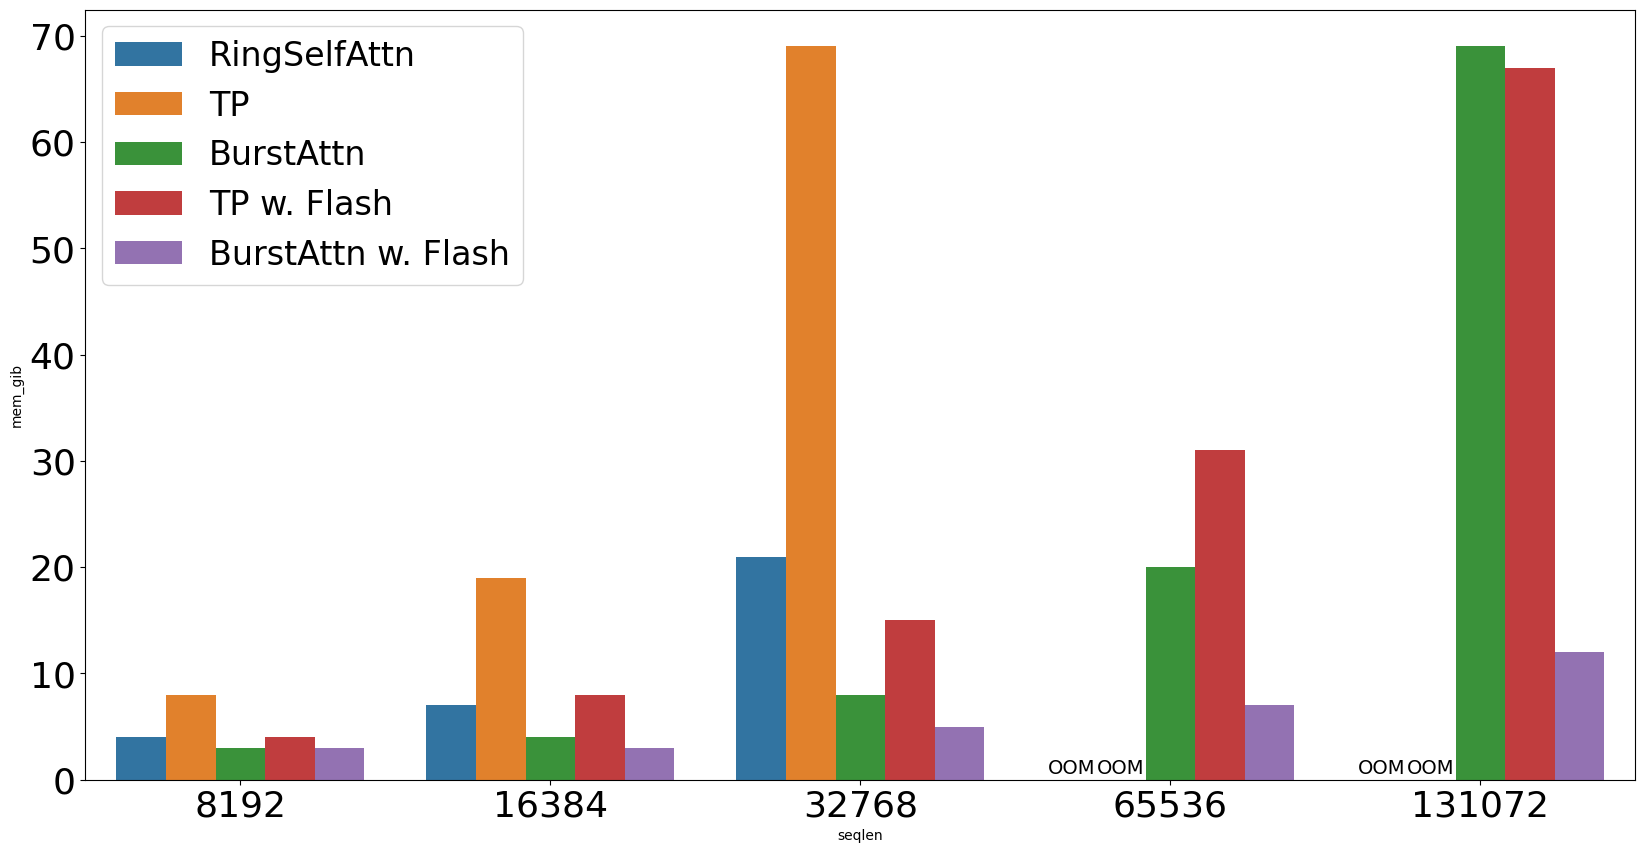

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv("./Inference.log")
df['mem_gib'] = df["mem"] // 1024
plt.figure(figsize=(20,10))
order = ["ring","tp","burst","tp_flash","burst_flash"]
ax = sns.barplot(df, x = "seqlen", y = "mem_gib", hue="func", ci=None, hue_order=order)
plt.legend(["RingSelfAttn","TP","BurstAttn","TP w. Flash","BurstAttn w. Flash"], fontsize = 24)
for i, bar in enumerate(ax.patches):
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width() / 2
    ax.tick_params(axis='x', labelsize=26)
    ax.tick_params(axis='y', labelsize=26)
    if np.isnan(y_value):
        ax.annotate('OOM', (x_value, 0), textcoords="offset points",
                    xytext=(0,4), ha='center', fontsize=14)